# Лабораторная работа №5

Вариант 8

## Цель работы
- изучение принципов построения информационных систем с использованием логических методов классификации.

## Задачи
- освоение технологии внедрения алгоритмов на онове решающих списков в приложения;
- освоение технологии внедрения алгоритмов на онове решающих деревьев в приложения;
- изучение параметров логической классификации;
- освоение модификаций логических методов классификации.

## Теоритечисеские сведения

Breast Cancer Wisconsin (Original) — это набор данных, который часто используется для задачи классификации рака молочной железы. Давай рассмотрим несколько теоретических сведений о наборе данных и задаче:

### Описание набора данных:
- Данные содержат измерения опухолей молочной железы, полученные с помощью изображений медицинских снимков.
- Каждая запись в наборе данных представляет собой измерения различных характеристик ячеек опухоли.
- Задача состоит в классификации опухоли как повторяющейся (R) или неповторяющейся (N).

### Оценка модели:
- Оценка модели включает в себя использование метрик, таких как точность, полнота, F1-мера и матрица ошибок.
- Эти метрики позволяют оценить производительность модели в предсказании доброкачественных и злокачественных опухолей.

Загрузим и подготовим данные

In [11]:
import pandas as pd

# Замени путь на актуальный
file_path = 'datasets/wpbc.data'

# Загрузка данных
column_names = ['id', 'diagnosis', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
                 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11',
                 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17',
                 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23',
                 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
                 'feature_31', 'feature_32', 'feature_33']

df = pd.read_csv(file_path, names=column_names)

# Посмотрим на первые несколько строк данных
df.head()


,id,diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Разбиваем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель
tree = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=2)
tree.fit(X_train, y_train)

# Делаем предсказания
y_pred = tree.predict(X_test)

# Оцениваем точность модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")


Точность модели: 0.47


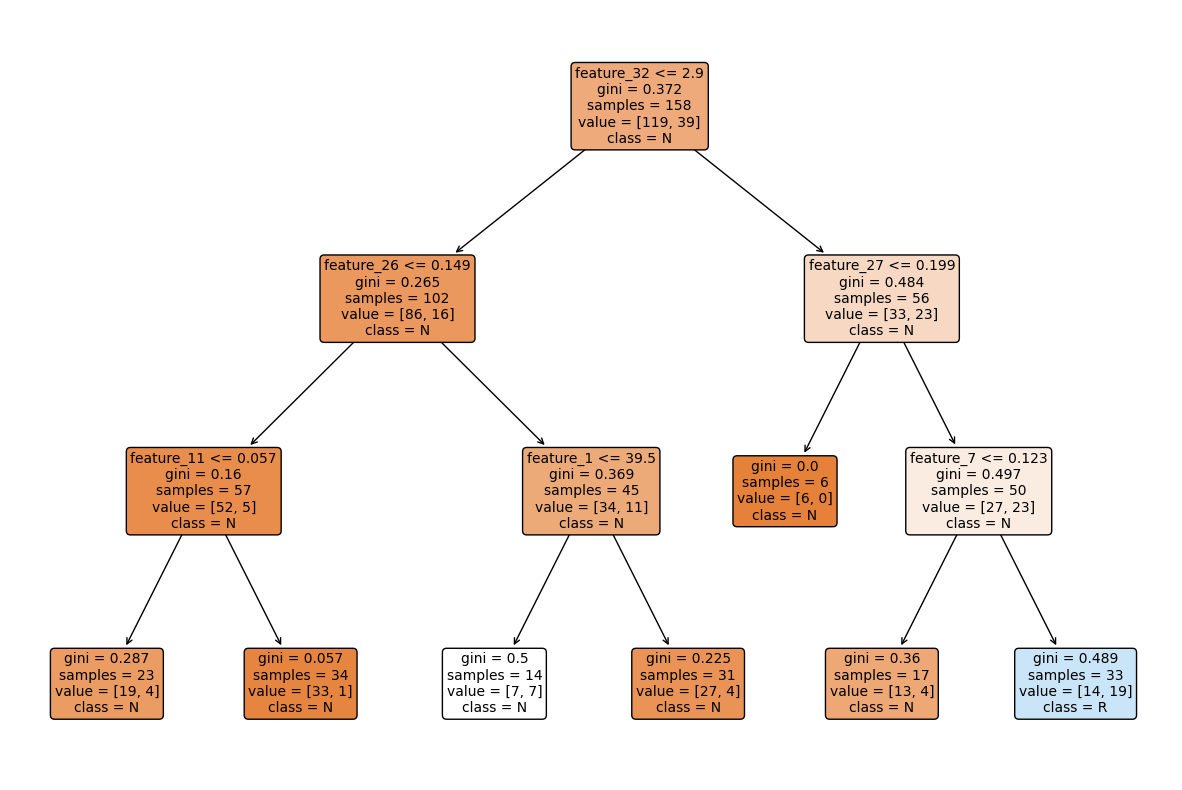

In [13]:
# Визуализация дерева решений

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True, fontsize=10)
plt.show()

In [14]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Задай значения max_depth, которые ты хочешь проверить
max_depth_values = [3, 5, 7, 10, None]

# Список для сохранения оценок кросс-валидации
cv_scores_depth = []

# Проходим по значениям max_depth
for depth in max_depth_values:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=21, max_features=2)
    scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')  # используем accuracy в качестве метрики
    cv_scores_depth.append(scores.mean())

# Теперь у нас есть список с оценками для каждого значения max_depth

In [15]:
# Задай значения max_features, которые ты хочешь проверить
max_features_values = [2, 4, 6, 8, 'sqrt', 'log2', None]

# Список для сохранения оценок кросс-валидации
cv_scores_features = []

# Проходим по значениям max_features
for features in max_features_values:
    tree = DecisionTreeClassifier(max_depth=5, random_state=21, max_features=features)
    scores = cross_val_score(tree, X, y, cv=5, scoring='accuracy')  # используем accuracy в качестве метрики
    cv_scores_features.append(scores.mean())

# Теперь у нас есть список с оценками для каждого значения max_features

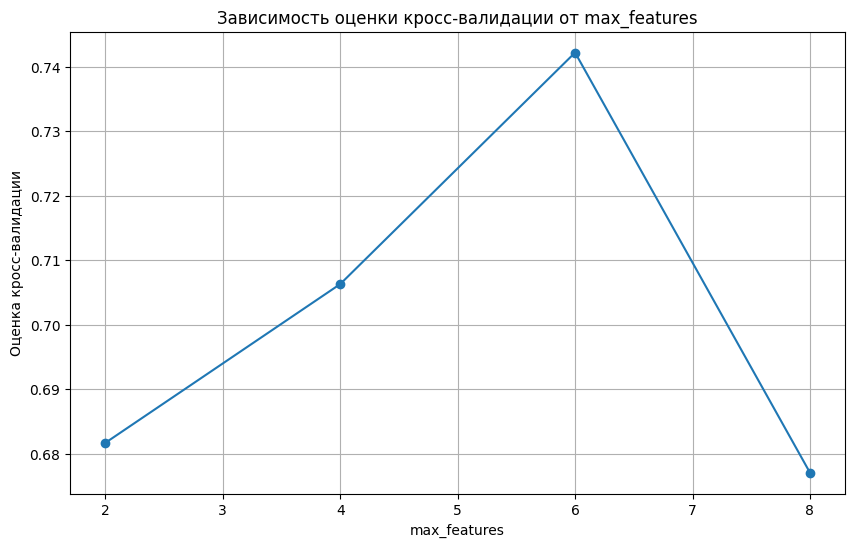

In [16]:
import matplotlib.pyplot as plt

# Убираем строковые значения из max_features_values
max_features_values = [val for val in max_features_values if isinstance(val, (int, float))]

# Убираем соответствующие значения из cv_scores_features
cv_scores_features = cv_scores_features[:len(max_features_values)]

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(max_features_values, cv_scores_features, marker='o')
plt.title('Зависимость оценки кросс-валидации от max_features')
plt.xlabel('max_features')
plt.ylabel('Оценка кросс-валидации')
plt.grid(True)
plt.show()


In [17]:
# Находим индекс максимального значения оценки кросс-валидации для max_depth
optimal_depth_index = np.argmax(cv_scores_depth)
optimal_depth = max_depth_values[optimal_depth_index]
print(f'Оптимальная глубина дерева (max_depth): {optimal_depth}')

# Находим индекс максимального значения оценки кросс-валидации для max_features
optimal_features_index = np.argmax(cv_scores_features)
optimal_features = max_features_values[optimal_features_index]
print(f'Оптимальное количество признаков (max_features): {optimal_features}')


Оптимальная глубина дерева (max_depth): 3
Оптимальное количество признаков (max_features): 6


In [18]:
# Создаем окончательную модель с оптимальными параметрами
final_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=21, max_features=optimal_features)

# Обучаем модель на всем тренировочном наборе данных
final_tree.fit(X, y)

# Делаем предсказания на тестовом наборе данных
y_final_pred = final_tree.predict(X_test)

# Оцениваем точность окончательной модели
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Точность окончательной модели: {final_accuracy:.2f}")

Точность окончательной модели: 0.88


In [20]:
!pip install mlxtend

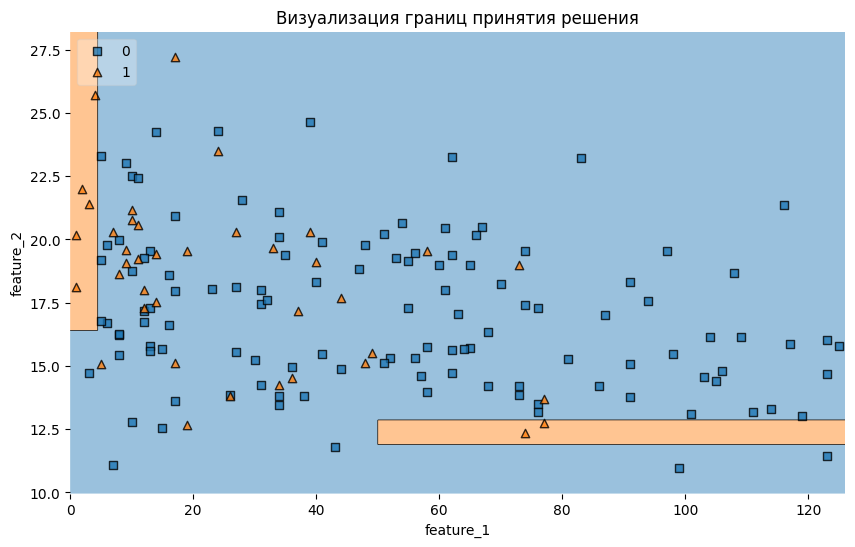

In [22]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Создаем матрицу признаков для обучения (возьмем первые два признака для простоты)
X_train_subset = X_train.iloc[:, :2].values

# Преобразуем целевую переменную в числовой формат (M -> 0, B -> 1)
y_train_numeric = y_train.map({'N': 0, 'R': 1})

# Создаем и обучаем модель (можно использовать вашу обученную модель)
tree = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=4)
tree.fit(X_train_subset, y_train_numeric)

# Визуализируем решающие границы
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_subset, y_train_numeric.values, clf=tree, legend=2)
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.title('Визуализация границ принятия решения')
plt.show()

In [23]:
!pip install plotly

In [24]:
# Посмотрим на признаки, которые использовались при обучении модели
feature_names = X.columns
feature_names

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15',
       'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20',
       'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25',
       'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30',
       'feature_31', 'feature_32', 'feature_33'],
      dtype='object')

In [25]:
tree_3d = DecisionTreeClassifier(random_state=42)
tree_3d.fit(X_train[['feature_1', 'feature_2', 'feature_3']], y_train)

DecisionTreeClassifier(random_state=42)

## Контрольные вопросы

### Поясните принцип построения дерева решений.
- Дерево решений строится с использованием принципа жадной максимизации прироста информации. В начале процесса все данные находятся в корне дерева, а затем при каждом разделении выбирается признак и порог, которые максимизируют прирост информации. Данный процесс повторяется рекурсивно для каждого поддерева, пока не выполнится критерий остановки (например, достигнута максимальная глубина дерева или число объектов в узле меньше определенного порога).

### Укажите статистическое определение информативности.
- Статистическое определение информативности основывается на измерении "чистоты" узла, которая может быть определена разными способами в зависимости от задачи. Например, для задач классификации это может быть доля объектов основного класса в узле.

### Поясните энтропийное определение информативности.
- Энтропийное определение информативности использует меру энтропии, которая измеряет степень хаоса или неопределенности в системе. Чем выше энтропия, тем менее информативен узел. Формула энтропии для узла: ![Формула](./img/formula.png), где с - количество классов, pi - доля объектов в i узле

### Что такое многоклассовая информативность? Для чего она применяется?
- Многоклассовая информативность применяется в задачах, где число классов больше двух. Она может быть определена, например, с использованием критерия Джини или энтропии. Применение многоклассовой информативности позволяет строить деревья решений для задач с более чем двумя классами.

### Поясните назначение и алгоритм бинаризации количественных признаков.
- Бинаризация количественных признаков нужна для того, чтобы преобразовать их в категориальные. Алгоритм заключается в выборе порога, который наилучшим образом разделяет данные на две категории.

### Поясните порядок поиска закономерностей в форме конъюнкций.
- Порядок поиска закономерностей в форме конъюнкций заключается в том, чтобы последовательно добавлять предикаты (условия) к правилам, проверяя, как они улучшают качество модели.